In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [44]:
## Carregar base de dados e excluir dados desnecessários
filename = 'semanal-regioes-desde-2013.xlsx'
regional_database = pd.read_excel("semanal-regioes-desde-2013.xlsx")
regional_database = regional_database.drop(range(0, 16))
headers = regional_database.iloc[0]
regional_database = pd.DataFrame(regional_database.values[1:], columns=headers)

In [45]:
## Excluir colunas desnecessárias
regional_database = regional_database.drop([
  'DATA FINAL',
  'NÚMERO DE POSTOS PESQUISADOS', 
  'UNIDADE DE MEDIDA',
  'DESVIO PADRÃO REVENDA',
  'PREÇO MÍNIMO REVENDA',
  'PREÇO MÁXIMO REVENDA',
  'MARGEM MÉDIA REVENDA',
  'COEF DE VARIAÇÃO REVENDA',
  'PREÇO MÉDIO DISTRIBUIÇÃO',
  'DESVIO PADRÃO DISTRIBUIÇÃO',
  'PREÇO MÍNIMO DISTRIBUIÇÃO',
  'PREÇO MÁXIMO DISTRIBUIÇÃO',
  'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
  axis=1
)

In [55]:
## Filtrar dados de interesse
database_filtered = regional_database[regional_database["REGIÃO"] == 'SUDESTE']
database_filtered = database_filtered[database_filtered["PRODUTO"] == 'GASOLINA COMUM']

database_filtered.head(3)

16,DATA INICIAL,REGIÃO,PRODUTO,PREÇO MÉDIO REVENDA
8,2012-12-30,SUDESTE,GASOLINA COMUM,2.729
38,2013-01-06,SUDESTE,GASOLINA COMUM,2.737
67,2013-01-13,SUDESTE,GASOLINA COMUM,2.724


In [65]:
## Renomear colunas
database_filtered = database_filtered.rename(columns={'DATA INICIAL': 'date', 'REGIÃO': 'region', 'PRODUTO': 'product', 'PREÇO MÉDIO REVENDA': 'price'})
database_filtered.head(1)

16,date,region,product,price
8,2012-12-30,SUDESTE,GASOLINA COMUM,2.729


In [66]:
database_filtered.to_excel('database.xlsx')

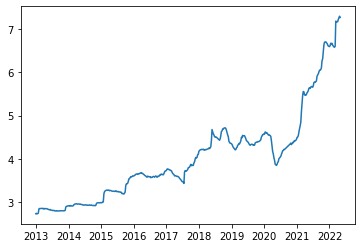

In [72]:
plt.plot(database_filtered['date'], database_filtered['price']);
plt.show()